# Exploratory Data Analysis on Bus Booking Data

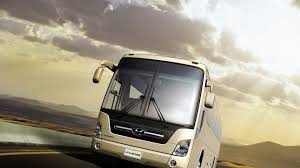<br/>

## 1. Problem Statement
  ### - 1.1 Introduction
  ### - 1.2 Bussiness Goal
  
## 2. Importing Packages

## 3. Loading Data
  ### - 3.1 Importing Data
  ### - 3.2 Description of the Datasets
  
## 4. Data Processing
  ### - 4.1 Data Preparation For EDA
  
## 5. Exploratory Data Analysis
  
## 6. Actionable Insights


## 1. Problem Statement

<img src="Problem_Statement.jpg" height='400px' width='100%'><br/>

## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.get_option("display.max_rows",10000)
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')     

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

## 3. Loading Data

### 3.1 Loading Data

In [195]:
df_bookings = pd.read_csv('Bookings.csv')

In [196]:
df_bookings.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index
0,24-12-2015 00:00,8192,2655,2790,19:00:00,20-02-2016 00:00,1.28547
1,2/1/2016 0:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
2,26-12-2015 00:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
3,13-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,1.92834
4,25-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,0.64260


###  3.2 Description of the Datasets

In [197]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 7 columns):
order_date                 4012 non-null object
route_no                   4012 non-null int64
from_stop                  4012 non-null int64
to_stop                    4012 non-null int64
departure_time             4012 non-null object
travel_date                4012 non-null object
passengers_booked_index    4012 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 219.5+ KB


**NOTE:**

We have no missing values.

In [198]:
df_bookings.describe()

,route_no,from_stop,to_stop,passengers_booked_index
count,4012.000000,4012.000000,4012.000000,4012.000000
mean,75094.020937,3409.501496,3266.111665,2.094505
std,67164.734847,1939.082936,1635.676635,2.186126
min,8192.000000,2655.000000,2655.000000,0.642600
25%,9288.000000,2655.000000,2655.000000,0.642600
50%,63912.000000,2655.000000,2790.000000,1.285470
75%,63916.000000,2790.000000,2790.000000,2.571210
max,226556.000000,9540.000000,8370.000000,17.356950


**NOTE:**

No outliers as of now.

###  4.1 Data Preparation For EDA

#### Converting input date to pandas datetime

In [201]:
df_bookings['order_date'] = pd.to_datetime(df_bookings['order_date'])
df_bookings['travel_date'] = pd.to_datetime(df_bookings['travel_date'])

In [202]:
df_bookings.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index
0,2015-12-24,8192,2655,2790,19:00:00,2016-02-20,1.28547
1,2016-02-01,8192,2655,2790,19:00:00,2016-06-02,0.64260
2,2015-12-26,8192,2655,2790,19:00:00,2016-06-02,0.64260
3,2016-03-13,8192,2655,2790,19:00:00,2016-12-05,1.92834
4,2016-03-25,8192,2655,2790,19:00:00,2016-12-05,0.64260


#### Removing Invalid entries

In [203]:
# calculating days between travel date and booking date and string in booking_to_travel_date_diff
df_bookings['booking_to_travel_date_diff'] = df_bookings['travel_date'] - df_bookings['order_date']

In [207]:
# Printing diff between travel date and booking date
df_bookings['booking_to_travel_date_diff'].value_counts(sort=True)

0 days      392
1 days      223
2 days      192
3 days      162
4 days      140
31 days     100
5 days      97 
6 days      95 
61 days     80 
7 days      70 
30 days     65 
92 days     53 
8 days      50 
9 days      46 
10 days     43 
153 days    39 
122 days    34 
60 days     32 
91 days     31 
11 days     31 
29 days     26 
123 days    24 
12 days     23 
214 days    22 
39 days     22 
34 days     21 
184 days    21 
19 days     20 
121 days    20 
13 days     20 
            .. 
195 days    1  
267 days    1  
386 days    1  
228 days    1  
114 days    1  
215 days    1  
57 days     1  
147 days    1  
316 days    1  
199 days    1  
155 days    1  
255 days    1  
172 days    1  
97 days     1  
277 days    1  
367 days    1  
220 days    1  
84 days     1  
117 days    1  
150 days    1  
93 days     1  
234 days    1  
352 days    1  
273 days    1  
216 days    1  
247 days    1  
89 days     1  
280 days    1  
223 days    1  
124 days    1  
Name: booking_to_travel_

**NOTE**: 

We can observe some negative value after taking difference i.e, travel date is less than booking date. This scenario is practically not possible. We have remove entries of such kind.

In [205]:
# Dropping invalid rows
df_bookings.drop(df_bookings[df_bookings['order_date'] > df_bookings['travel_date']].index,axis=0, inplace=True)

In [209]:
# Printing diff between travel date and booking date
df_bookings['booking_to_travel_date_diff'].value_counts(sort=True)

0 days      392
1 days      223
2 days      192
3 days      162
4 days      140
31 days     100
5 days      97 
6 days      95 
61 days     80 
7 days      70 
30 days     65 
92 days     53 
8 days      50 
9 days      46 
10 days     43 
153 days    39 
122 days    34 
60 days     32 
91 days     31 
11 days     31 
29 days     26 
123 days    24 
12 days     23 
214 days    22 
39 days     22 
34 days     21 
184 days    21 
19 days     20 
121 days    20 
13 days     20 
            .. 
195 days    1  
267 days    1  
386 days    1  
228 days    1  
114 days    1  
215 days    1  
57 days     1  
147 days    1  
316 days    1  
199 days    1  
155 days    1  
255 days    1  
172 days    1  
97 days     1  
277 days    1  
367 days    1  
220 days    1  
84 days     1  
117 days    1  
150 days    1  
93 days     1  
234 days    1  
352 days    1  
273 days    1  
216 days    1  
247 days    1  
89 days     1  
280 days    1  
223 days    1  
124 days    1  
Name: booking_to_travel_

**NOTE**:

We can observe that there are no negative entries.

#### Extracting month, date, day, day of week using pandas DatetimeIndex

In [208]:
# Extracting month
df_bookings['travel_month'] = pd.DatetimeIndex(df_bookings['order_date']).month

# Extracting year
df_bookings['travel_year'] = pd.DatetimeIndex(df_bookings['order_date']).year

# Extracting day
df_bookings['travel_day'] = pd.DatetimeIndex(df_bookings['order_date']).day

# Extracting day of week
df_bookings['travel_day_of_week'] = pd.DatetimeIndex(df_bookings['order_date']).dayofweek

DAY_OF_WEEK_MAP = {
                      0: 'Sunday', 
                      1: 'Monday', 
                      2: 'Tuesday', 
                      3: 'Wednesday', 
                      4: 'Thursday',  
                      5: 'Friday', 
                      6: 'Saturday'
                  }
# Converting day of week in int format to string format 
df_bookings['travel_day_of_week'] = df_bookings['travel_day_of_week'].map(DAY_OF_WEEK_MAP)

In [22]:
df_bookings.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index,book_to_travel_date,booking_to_travel_date_diff
0,2015-12-24,8192,2655,2790,19:00:00,2016-02-20,1.28547,58 days,58 days
1,2016-02-01,8192,2655,2790,19:00:00,2016-06-02,0.64260,122 days,122 days
2,2015-12-26,8192,2655,2790,19:00:00,2016-06-02,0.64260,159 days,159 days
3,2016-03-13,8192,2655,2790,19:00:00,2016-12-05,1.92834,267 days,267 days
4,2016-03-25,8192,2655,2790,19:00:00,2016-12-05,0.64260,255 days,255 days


  
## 5. Exploratory Data Analysis

### 5.1 Are there any bus cancellations?

In [147]:
df_bookings[df_bookings['travel_date'].isnull()]['travel_date'].count()

0

**Observations**:

We observe there are no cancellations of bus

### 5.2  How many days before bookings are done?

In [210]:
df_bookings['booking_to_travel_date_diff'].value_counts(sort=True).head(20)

0 days      392
1 days      223
2 days      192
3 days      162
4 days      140
31 days     100
5 days      97 
6 days      95 
61 days     80 
7 days      70 
30 days     65 
92 days     53 
8 days      50 
9 days      46 
10 days     43 
153 days    39 
122 days    34 
60 days     32 
91 days     31 
11 days     31 
Name: booking_to_travel_date_diff, dtype: int64

Text(0, 0.5, 'Count')

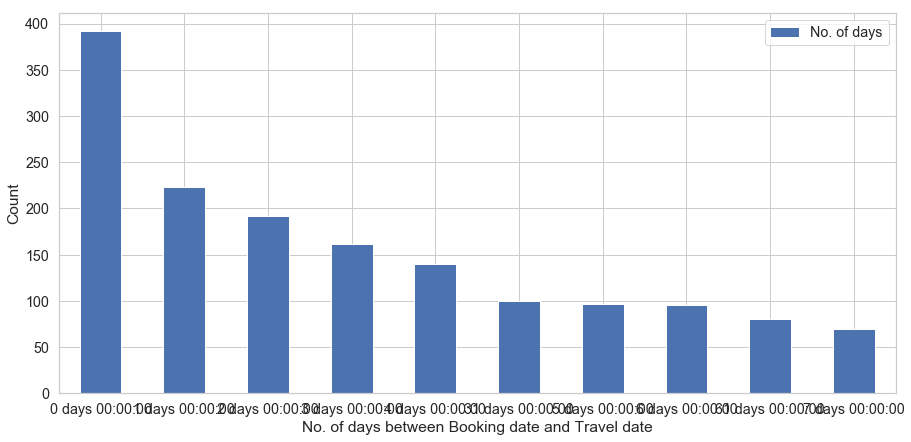

In [212]:
df = pd.DataFrame(
	{
	'No. of days': df_bookings['booking_to_travel_date_diff'].value_counts(sort=True).head(10)
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("No. of days between Booking date and Travel date")
ax.set_ylabel("Count")

**Observations:**

We see most of the bookings are done on same day of travel date.

### 5.3  In how many routes does the bus travel?

In [214]:
df_bookings['route_no'].value_counts()

63916     781
63912     768
8192      507
9288      449
190808    300
190716    271
226556    85 
Name: route_no, dtype: int64

Text(0, 0.5, 'Count')

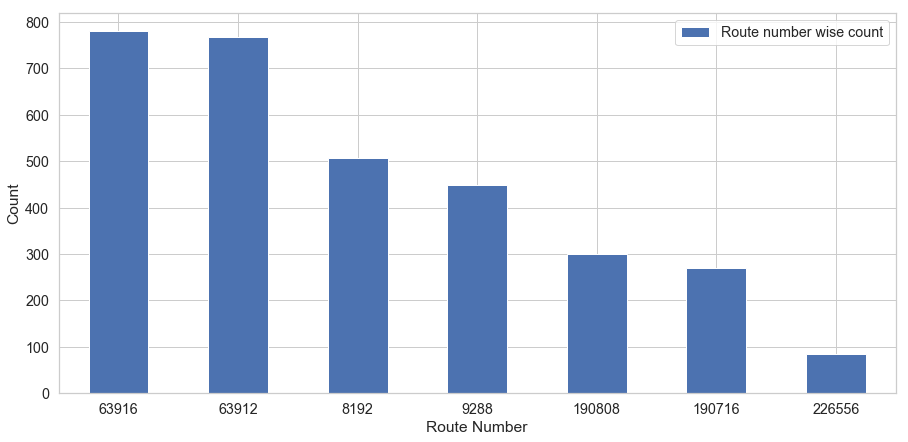

In [215]:
df = pd.DataFrame(
	{
	'Route number wise count':df_bookings['route_no'].value_counts()
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Route Number")
ax.set_ylabel("Count")

**Observations:**

Route numbers **63916** and **63912** has maximum bookings.

#### Route Details by from_stop and to_stop and departure_time

In [62]:
df_bookings.groupby(['from_stop','to_stop'])['departure_time'].value_counts()

from_stop  to_stop  departure_time
2655       2790     11:00:00          768
                    19:00:00          507
                    18:30:00          449
           8370     10:15:00          271
2790       2655     11:00:00          781
8370       2655     12:00:00          300
9540       2925     7:00:00           85 
Name: departure_time, dtype: int64

### 5.4 How are bus bookings?

#### 5.4.1 Month-Wise

In [80]:
df_bookings['travel_month'].value_counts(sort=True)

6     538
5     447
4     393
2     361
3     337
7     322
1     305
8     137
10    104
11    84 
12    78 
9     55 
Name: travel_month, dtype: int64

Text(0, 0.5, 'Count')

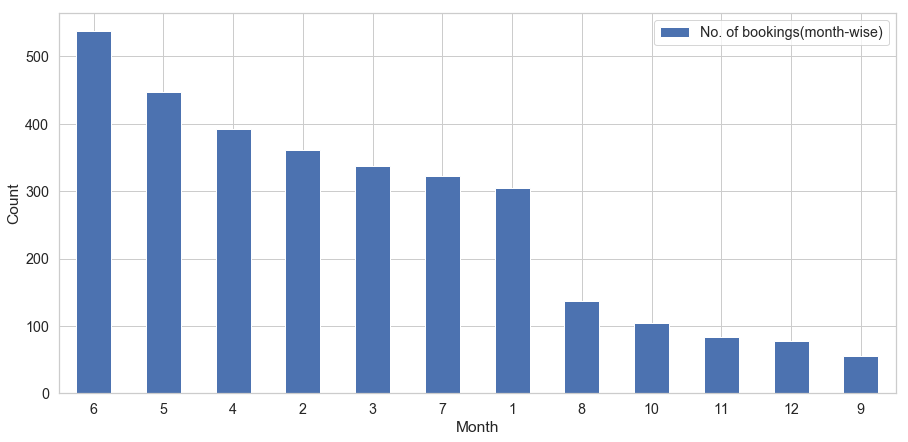

In [216]:
df = pd.DataFrame(
	{
	'No. of bookings(month-wise)': df_bookings['travel_month'].value_counts(sort=True)
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Month")
ax.set_ylabel("Count")

**Observations**:

Most of the bookings happen in month of **April, May, June**.

#### 5.4.2  Year-Wise

In [91]:
df_bookings['travel_year'].value_counts(sort=True)

2016    2895
2015    266 
Name: travel_year, dtype: int64

Text(0, 0.5, 'Count')

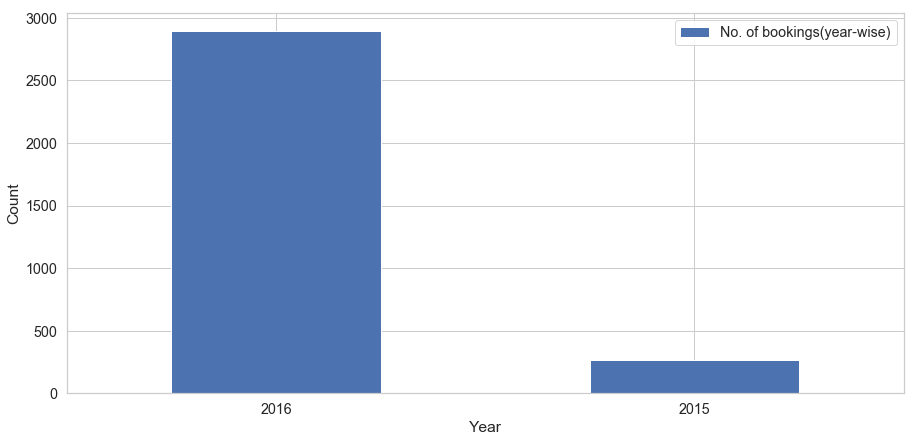

In [217]:
df = pd.DataFrame(
	{
	'No. of bookings(year-wise)': df_bookings['travel_year'].value_counts(sort=True)
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Year")
ax.set_ylabel("Count")

**Observations:**

We observe minimal bookings in 2015. May be because it is first year for the company in market.
Company improved a lot in 2016. **91%** of total bookings came in 2016.

#### 5.4.3  Day-Wise

In [108]:
df_bookings['travel_day'].sort_values(ascending=False).value_counts(sort=False)

2     93 
4     123
6     255
8     64 
10    13 
12    50 
14    112
16    116
18    125
20    108
22    119
24    113
26    114
28    104
30    92 
1     18 
3     96 
5     134
7     265
11    34 
13    123
15    130
17    124
19    114
21    116
23    101
25    106
27    94 
29    89 
31    16 
Name: travel_day, dtype: int64

Text(0, 0.5, 'Count')

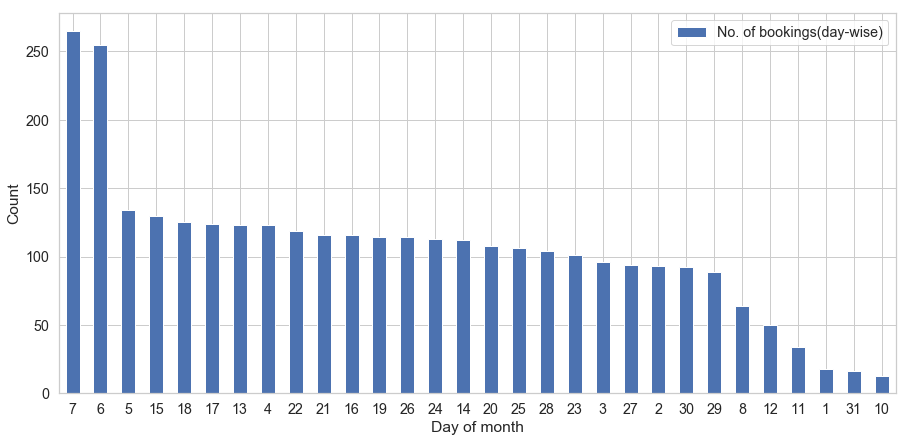

In [218]:
df = pd.DataFrame(
	{
	'No. of bookings(day-wise)': df_bookings['travel_day'].value_counts(sort=True)
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Day of month")
ax.set_ylabel("Count")

**Observations:**

Most of the booking happenned on **6th and 7th** of every month.

#### 5.4.4  Day of week -Wise

In [116]:
df_bookings['travel_day_of_week'].value_counts()

Saturday     494
Friday       467
Tuesday      460
Wednesday    455
Sunday       447
Thursday     428
Monday       410
Name: travel_day_of_week, dtype: int64

Text(0, 0.5, 'Count')

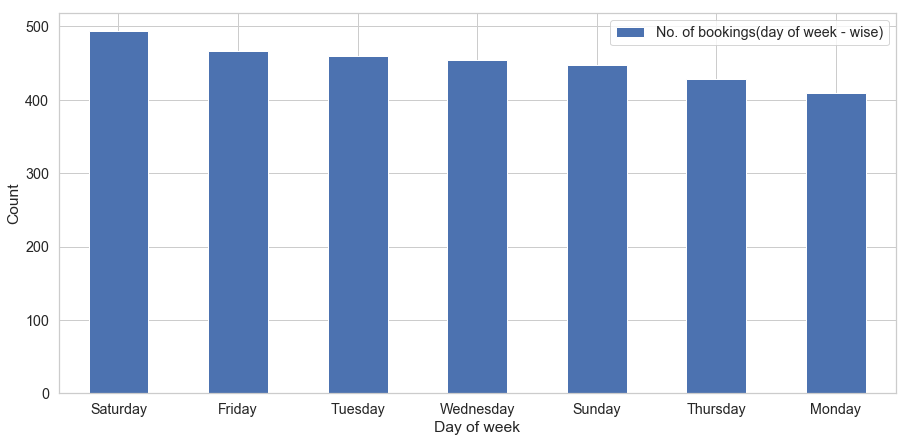

In [221]:
df = pd.DataFrame(
	{
	'No. of bookings(day of week - wise)': df_bookings['travel_day_of_week'].value_counts(sort=True)
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Day of week")
ax.set_ylabel("Count")

**Observations:**

We have almost equal bookings on each day of week.

#### 5.4.5  Departure time - Wise

In [134]:
df_bookings['departure_time'].value_counts()

11:00:00    1927
19:00:00    654 
18:30:00    572 
12:00:00    386 
10:15:00    373 
7:00:00     100 
Name: departure_time, dtype: int64

Text(0, 0.5, 'Count')

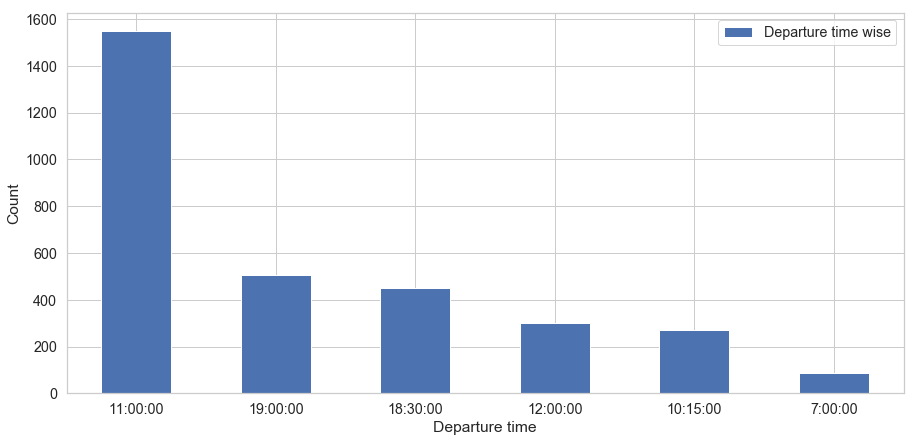

In [223]:
df = pd.DataFrame(
	{
	'Departure time wise':df_bookings['departure_time'].value_counts()
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("Departure time")
ax.set_ylabel("Count")

**Observations:**

We observe most of the bookings in morning 11:00 am.

### 5.5 How many tickets are booked in one transaction?

In [225]:
# Changing datatype from float to int because bookings will always be an integer value
df_bookings = df_bookings.round().astype({"passengers_booked_index": int})

In [226]:
df_bookings.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index,booking_to_travel_date_diff,travel_month,travel_year,travel_day,travel_day_of_week
0,2015-12-24,8192,2655,2790,19:00:00,2016-02-20,1,58 days,12,2015,24,Wednesday
1,2016-02-01,8192,2655,2790,19:00:00,2016-06-02,1,122 days,2,2016,1,Sunday
2,2015-12-26,8192,2655,2790,19:00:00,2016-06-02,1,159 days,12,2015,26,Friday
3,2016-03-13,8192,2655,2790,19:00:00,2016-12-05,2,267 days,3,2016,13,Saturday
4,2016-03-25,8192,2655,2790,19:00:00,2016-12-05,1,255 days,3,2016,25,Thursday


In [230]:
# we are taking output from first index to remove number of bookings of size 0.
df_bookings['passengers_booked_index'].value_counts()

1     1773
3     428 
2     355 
4     231 
6     117 
5     77  
8     47  
7     41  
10    23  
9     22  
12    14  
11    13  
14    7   
13    5   
15    4   
17    3   
16    1   
Name: passengers_booked_index, dtype: int64

Text(0, 0.5, 'Count')

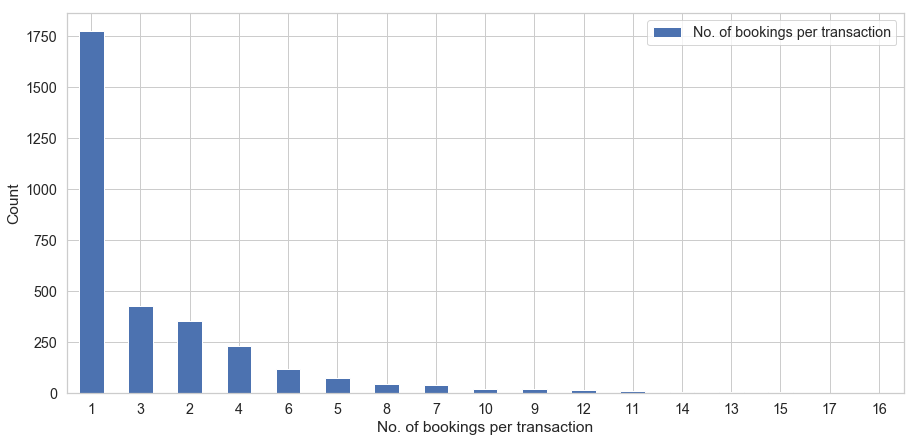

In [229]:
df = pd.DataFrame(
	{
	'No. of bookings per transaction':df_bookings['passengers_booked_index'].value_counts()
	}
	) 
ax = df.plot.bar(rot=0,figsize=(15, 7))
ax.set_xlabel("No. of bookings per transaction")
ax.set_ylabel("Count")

**Observations:**

Most people prefer to travel alone.

### 5.6  Do they have any bookings more than bus capacity?

**NOTE:**

Bus has capacity of 36 passengers.

In [178]:
df_bookings.groupby(['route_no','travel_date'])['passengers_booked_index'].sum().value_counts(sort=True)

6     21
10    21
12    19
4     19
3     18
7     17
24    17
13    17
5     17
1     15
14    15
27    14
22    14
8     14
9     14
19    14
16    14
26    13
18    13
11    13
2     12
17    12
0     11
15    11
20    11
21    11
29    11
25    10
23    7 
28    7 
30    6 
31    5 
32    3 
36    1 
41    1 
Name: passengers_booked_index, dtype: int64

**Observations:**

we could see there is one booking(41) which crosses bus capacity

  
## 6. Actionable Insights

1. Bus owners should work number of tickets sold per bus.
2. As most people prefer to travel alone, company should work giving discounts on buying multiple tickets to increase its revenue.
3. As count of people travelling at month end and start is very less, they should work attracting more passengers during this period.
4. People dont travel much from August to December in routes where buses are running. May be they should try to run buses in some other areas as well.
5. As tickets are sold before the travel date, company should work on predicting NO SHOWS count and try to over sell tickets according to it to increase its revenue.